In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from matplotlib import cm
import glob
import sys
import json
import codecs

%matplotlib inline
sys.path.append('../')

from models.Problem_Class import OptimalControl, OptimalControlConvex
from opt_algos.projected_gradient_descent import projected_gradient_descent, projector
from opt_algos.projected_accelerated_gradient_descent import accelerated_gradient_descent



# Objective functions plots

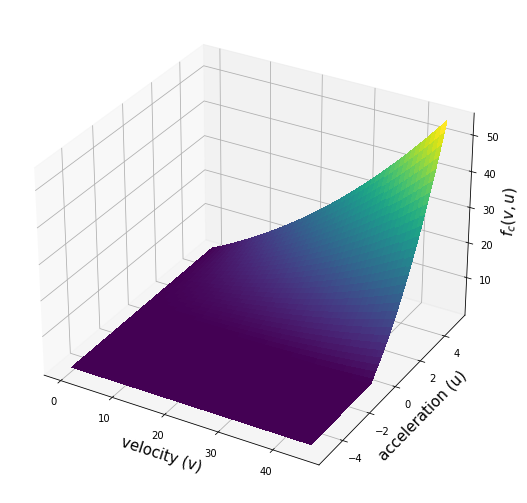

In [2]:
model_full = OptimalControl([0], 0, 0, 0, 0)
v = np.linspace(0, 45, 500)
a = np.linspace(-5, 5, 250)
X, Y = np.meshgrid(v, a)
fc = model_full.fuel_model(X, Y)
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.grid()

ax.plot_surface(X, Y, fc, cmap='viridis', edgecolor='none', linewidth=0, antialiased=False)
ax.set_zlabel(r'$f_c(v, u)$', fontsize=15)
ax.set_xlabel('velocity (v)', fontsize=15)
ax.set_ylabel('acceleration (u)', fontsize=15)
plt.savefig("results/obj_1.png", dpi = 450)

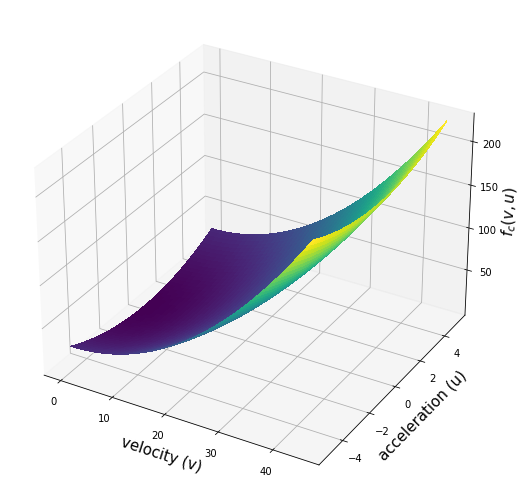

In [3]:
model_full = OptimalControl([0], 0, 0, 0, 0)
v = np.linspace(0, 45, 500)
a = np.linspace(-5, 5, 250)
X, Y = np.meshgrid(v, a)
fc = 1e-1 * X**2 + Y**2
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.grid()

ax.plot_surface(X, Y, fc, cmap='viridis', edgecolor='none', linewidth=0, antialiased=False)
ax.set_zlabel(r'$f_c(v, u)$', fontsize=15)
ax.set_xlabel('velocity (v)', fontsize=15)
ax.set_ylabel('acceleration (u)', fontsize=15)
plt.savefig("results/obj_2.png", dpi = 450)

# Import data

In [4]:
files = glob.glob("traffic_data/*.csv")
data = {}
for i, file in enumerate(files): 
    temp = pd.read_csv(file)
    temp = temp[2000:3500]
    data[i] = {}
    v = np.array(temp.Velocity)*(1000/3600)
    data[i]["time"] = np.array(temp.Time) - min(temp.Time)
    data[i]["vl"] = np.array(temp.Velocity)*(1000/3600)
    data[i]["xl"] = np.array(temp.DistanceGPS) - min(np.array(temp.DistanceGPS)) + 2 * v[0]
    s = np.diff(v)
    data[i]["u0"] = np.append(s, s[-1])/0.1
    data[i]["y0"] = [0, v[0]]

# velocity = 30 * np.ones(time.shape)
# position = 20 + np.multiply(time, velocity) 


In [5]:
files

['traffic_data/2021-03-24-12-39-15_2T3MWRFVXLW056972_masterArray_0_6438.csv',
 'traffic_data/2021-04-15-21-32-46_2T3MWRFVXLW056972_masterArray_1_3685.csv',
 'traffic_data/2021-04-22-12-47-13_2T3MWRFVXLW056972_masterArray_0_7050.csv']

# Trajectories plots

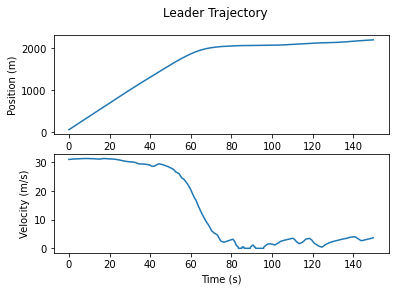

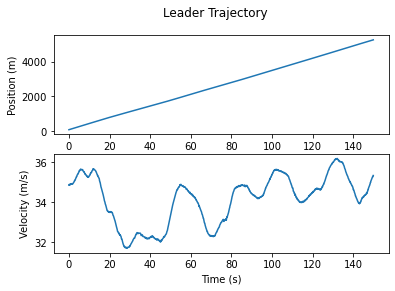

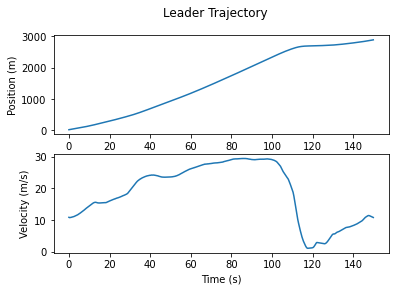

In [41]:
for i in data.keys():
    fig, axs = plt.subplots(2)
    fig.suptitle('Leader Trajectory')
    axs[0].plot(data[i]["time"], data[i]["xl"])
    axs[0].set_xlabel("Time (s)")
    axs[0].set_ylabel("Position (m)")
    axs[1].plot(data[i]["time"], data[i]["vl"])
    axs[1].set_xlabel("Time (s)")
    axs[1].set_ylabel("Velocity (m/s)")
    plt.savefig("results/traj{}.png".format(i), dpi = 450)

# Run algorithms

In [20]:
## General params
max_iterations= 1e3
epsilon=1e-6

Algorithm 1: project GD 

In [ ]:
## Original Objective 
i = 2
eta = 0.005
exp_name = "original_PAGD_{}_{}".format(i, eta)
model = OptimalControl(data[i]["time"], data[i]["y0"][0], data[i]["y0"][1], data[i]["xl"], data[i]["vl"])
A, b = model.constraints()
sol = projected_gradient_descent(model, eta, max_iterations=max_iterations, epsilon=epsilon, x0=data[i]["u0"], A = A.T, b = b)


out_file = open("results/{}.json".format(exp_name), "w") 
json.dump(sol, out_file, indent = 6) 
out_file.close() 

plt.plot(data[i]["vl"])
X, V = model.system_solve(sol["solution"])
fc = model.F(np.array(sol["solution"]))
plt.plot(V)
plt.legend(["Leader", "Optimal follower"], fontsize = 1)
plt.xlabel("Time (s)")
plt.ylabel("Velocity(S)")
plt.title("Fuel consumption = {}".format(np.round(fc, 3)))
plt.savefig("results/{}.png".format(exp_name), dpi = 300)

Objective value =  136.00485750365038
Objective value =  130.82521879740793
Objective value =  130.6064146812019
Objective value =  130.38066265403933
Objective value =  130.1985609371507
Objective value =  129.99128140863746
Objective value =  129.82985970675247
Objective value =  129.6682949487227
Objective value =  129.4908433257945
Objective value =  129.33568183491832
Objective value =  129.20823762598525
Objective value =  129.04427397791667
Objective value =  128.88527399875284
Objective value =  128.70343894054807
Objective value =  128.53205056686167
Objective value =  128.38652127352893
Objective value =  128.25904714088912
Objective value =  128.19917958934
Objective value =  128.13879160204303
Objective value =  128.074146643028
Objective value =  128.0272121888852
Objective value =  127.96053606703656
Objective value =  127.90607573927873
Objective value =  127.8432779543431
Objective value =  127.78256935589282
Objective value =  127.7352493459424
Objective value =  127.6

Objective value =  121.73280054049941
Objective value =  121.70619597682892
Objective value =  121.68426718514907
Objective value =  121.65265894026754
Objective value =  121.63086521502167
Objective value =  121.6094672438553
Objective value =  121.60737275617039
Objective value =  121.58963739499764
Objective value =  121.57361610535467
Objective value =  121.56408055463113
Objective value =  121.54377975208956
Objective value =  121.52166700462436
Objective value =  121.50448125896014
Objective value =  121.48057202226066
Objective value =  121.45973126946076
Objective value =  121.43764079033384
Objective value =  121.42139403153014
Objective value =  121.41702550305095
Objective value =  121.40552063518876
Objective value =  121.38340109870757
Objective value =  121.36605202401235
Objective value =  121.3438539253693
Objective value =  121.3317249375084
Objective value =  121.30021418795755
Objective value =  121.28323347683653
Objective value =  121.25819447109428
Objective value

Objective value =  118.61956638922983
Objective value =  118.6083198901398
Objective value =  118.59134631452022
Objective value =  118.58095803598897
Objective value =  118.57140931340423
Objective value =  118.56413196153812
Objective value =  118.5543170596582
Objective value =  118.54367670026008
Objective value =  118.53597828211653
Objective value =  118.52441963633149
Objective value =  118.51245371465333
Objective value =  118.50356549975886
Objective value =  118.49583405322555
Objective value =  118.48497410227526
Objective value =  118.47518832689946
Objective value =  118.46586061015631
Objective value =  118.4543258038441
Objective value =  118.44179753005953
Objective value =  118.43394082260836
Objective value =  118.424247806129
Objective value =  118.41501261515745
Objective value =  118.40477339549531
Objective value =  118.39519237575988
Objective value =  118.38507463756274
Objective value =  118.37889091830039
Objective value =  118.37025464815285
Objective value =

Objective value =  117.01230258302542
Objective value =  117.00600907549942
Objective value =  117.00202582615753
Objective value =  116.99693536541383
Objective value =  116.99179021467285
Objective value =  116.98715968351543
Objective value =  116.98343328428999
Objective value =  116.98153088391508
Objective value =  116.97638952732248
Objective value =  116.97316107933177
Objective value =  116.96782431615033
Objective value =  116.96451027330477
Objective value =  116.95976203310664
Objective value =  116.95322712847172
Objective value =  116.94845301792958
Objective value =  116.94419294375486
Objective value =  116.93688799615461
Objective value =  116.93404117881356
Objective value =  116.93091703530247
Objective value =  116.92472022383073
Objective value =  116.91895225671838
Objective value =  116.91442936829345
Objective value =  116.91537221887185
Objective value =  116.91006865132566
Objective value =  116.90696912320539
Objective value =  116.90336261297458
Objective va

Objective value =  116.27899092152244
Objective value =  116.27406636944966
Objective value =  116.27226348771451
Objective value =  116.27037290306748
Objective value =  116.2673660883638
Objective value =  116.26447737420975
Objective value =  116.2610917975954
Objective value =  116.25836066882631
Objective value =  116.2572180817894
Objective value =  116.2522558990953
Objective value =  116.25050673074217
Objective value =  116.24720578504817
Objective value =  116.24589421625998
Objective value =  116.2420459698482
Objective value =  116.2401098229005
Objective value =  116.23954205544852
Objective value =  116.24154269891369
Objective value =  116.2374750719919
Objective value =  116.23426664509408
Objective value =  116.23147273552277
Objective value =  116.23013124267158
Objective value =  116.23346842850897
Objective value =  116.23215906332436
Objective value =  116.23012502282651
Objective value =  116.22948382997359
Objective value =  116.22481395780899
Objective value =  

Algorithm 2: projected AGD 

In [ ]:
## Original Objective 
i = 2
exp_name = "original_AGD_6438_0.01"
model = OptimalControl(data[i]["time"], data[i]["y0"][0], data[i]["y0"][1], data[i]["xl"], data[i]["vl"])
A, b = model.constraints()
sol = accelerated_gradient_descentelerated_gradient_descentelerated_gradient_descentelerated_gradient_descent(model, 0.01, max_iterations=max_iterations, epsilon=epsilon, x0=data[i]["u0"], A = A.T, b = b)


out_file = open("resuls/{}.json".formar(exp_name), "w") 
json.dump(sol, out_file, indent = 6) 
out_file.close() 

plt.plot(data[i]["vl"])
X, V = model.system_solve(sol["solution"])
plt.plot(V)

## Plotting

In [8]:
files = glob.glob("results/*.json")
figure = plt.figure()
for i, file in enumerate(files): 
    with open("myfile.json") as json_file:
        res = json.load(json_file)
        plt.plot(res["f"])
        
        
        
